# Playground for Logisitic Regression
___

Plan of action: 
* create logistic regression model
* load in data
* Split data into test/validation dataset
* create submission
___

In [18]:
%pylab inline
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
from preprocess import loadPreData
from preprocess import scoreAUC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
import sklearn
import statsmodels.discrete.discrete_model as sm
subm_folder = './submissions'

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import data
___

In [5]:
data = loadPreData()

Index([u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent'],
      dtype='object')
Index([u'Id', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy'],
      dtype='object')


In [6]:
X = data['train'].get_values().astype(float)
Y = data['labels']

## Split into train/validation set
___

In [9]:
# split data into train and test sets
seed = 7
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## Train model
___

In [11]:
logreg = LogisticRegression(C=1e5)

In [15]:
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [16]:
preds = model.predict(X_test)

## Plot AUC on validation data
___

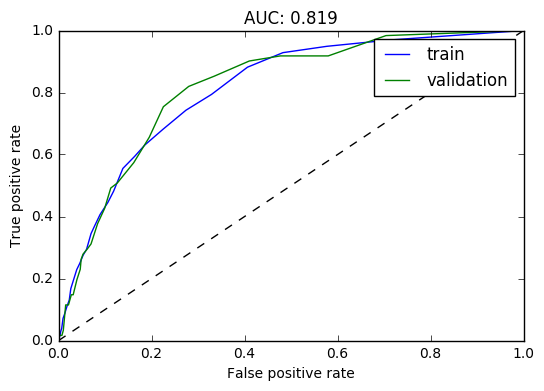

In [21]:
probs = model.predict_proba(X_train)
auc = scoreAUC(y_train,probs)
plt.plot(auc['fpr'],auc['tpr'],label='train');

probs = model.predict_proba(X_test)
auc = scoreAUC(y_test,probs)
plt.plot(auc['fpr'],auc['tpr'],label='validation');

plt.legend();

plt.plot([0,1.],[0,1.],'k--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');


plt.title('AUC: {:.3f}'.format(auc['score']));

## Prepare submission
___

In [20]:
X_sub = data['test'].get_values()
probs = model.predict_proba(X_sub)
#prepare submission
ss = pd.DataFrame(columns=['Id','WnvPresent'])
ss['WnvPresent'] = pd.Series(probs[:,1])
ss['Id'] = data['test'].index + 1
ss.to_csv(os.path.join(subm_folder, 'lg_submission.csv'), index=False)

Gives a score of 0.69919, so around 733rd

## Import data with extra features
___

In [3]:
data = loadPreData(features=True)
X = data['train'].get_values().astype(float)
Y = data['labels']
# split data into train and test sets
seed = 7
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

Index([u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy', u'NumMosquitos', u'WnvPresent'],
      dtype='object')
Index([u'Id', u'Address', u'Species', u'Block', u'Street', u'Trap',
       u'AddressNumberAndStreet', u'Latitude', u'Longitude',
       u'AddressAccuracy'],
      dtype='object')


In [10]:
model = LogisticRegression(C=1e5)
model.fit(X_train, y_train)

### Plot AUC

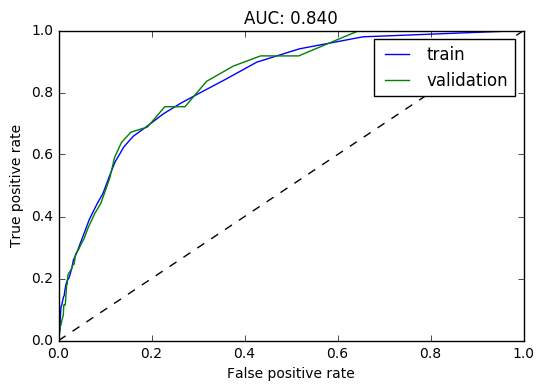

In [7]:
preds = model.predict(X_test)

probs = model.predict_proba(X_train)
auc = scoreAUC(y_train,probs)
plt.plot(auc['fpr'],auc['tpr'],label='train');

probs = model.predict_proba(X_test)
auc = scoreAUC(y_test,probs)
plt.plot(auc['fpr'],auc['tpr'],label='validation');

plt.legend();

plt.plot([0,1.],[0,1.],'k--');
plt.xlabel('False positive rate');
plt.ylabel('True positive rate');


plt.title('AUC: {:.3f}'.format(auc['score']));

## print odds-ratios of logistic model

In [44]:
for s,c in sorted(zip(np.exp(model.coef_[0]),data['train'].columns),reverse=True):
    print("{} : {}".format(c,s))
    #[x for _,x in sorted(zip(Y,X))]
 

month : 7.36449417389
Latitude : 3.79429026744
Long_int : 2.90643583793
Tmin_y : 1.61587952378
Cool_x : 1.50456069486
AvgSpeed_y : 1.45629349283
WetBulb_x : 1.375272564
Tmax_y : 1.32668346442
DewPoint_x : 1.27608613354
Tavg_x : 1.22640910417
AddressAccuracy : 1.21417802246
PrecipTotal_y : 1.16617925474
Heat_y : 1.15701135424
SnowFall_x : 1.08854784852
ResultDir_x : 1.08837177119
Cool_y : 1.08819320753
ResultSpeed_x : 1.0663813426
day : 1.06519201861
pMos1 : 1.04444394044
pWNV1 : 1.01221319892
Sunrise_x : 1.00839470601
Block : 1.00550876904
DateCount : 1.0035546796
Trap : 1.00158492276
Depth_x : 1.0
Sunset_x : 0.998764820691
Street : 0.998134628854
Tmax_x : 0.982781581996
ResultDir_y : 0.90990161809
ResultSpeed_y : 0.833266305669
Tmin_x : 0.822857902142
DewPoint_y : 0.813922705064
AvgSpeed_x : 0.811381621574
PrecipTotal_x : 0.801062148983
Species : 0.706488881406
WetBulb_y : 0.698657050063
StnPressure_y : 0.693831708086
Depart_x : 0.675026982297
SeaLevel_y : 0.66804243399
Lat_int : 0.65